# ELECTRIC VEHICLE DATA ANALYSIS

## STEP 1: Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


## STEP 2: Reading the Data

In [2]:
data = pd.read_csv("/kaggle/input/electric-vehicle-data-1997-2024-update-version/us_car_data.csv")

## STEP 3: Data Exploring

In [3]:
data.head(5)

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,latitude
0,Thurston,Tumwater,WA,98512,2019,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,220,0,22,242565116,PUGET SOUND ENERGY INC,53067010910,-122.913102,47.013593
1,Island,Clinton,WA,98236,2022,NISSAN,LEAF,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,10,183272785,PUGET SOUND ENERGY INC,53029972000,-122.359364,47.979655
2,Snohomish,Snohomish,WA,98290,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,266,0,44,112552366,PUGET SOUND ENERGY INC,53061052502,-122.091505,47.915555
3,King,Seattle,WA,98134,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,322,0,11,6336319,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033009300,-122.329815,47.579810
4,Snohomish,Edmonds,WA,98020,2013,TESLA,MODEL S,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,208,69900,21,186212960,PUGET SOUND ENERGY INC,53061050403,-122.375070,47.808070


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134474 entries, 0 to 134473
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   County                 134474 non-null  object 
 1   City                   134474 non-null  object 
 2   State                  134474 non-null  object 
 3   Postal Code            134474 non-null  int64  
 4   Model Year             134474 non-null  int64  
 5   Make                   134474 non-null  object 
 6   Model                  134474 non-null  object 
 7   Electric Vehicle Type  134474 non-null  object 
 8   CAFV                   134474 non-null  object 
 9   Electric Range         134474 non-null  int64  
 10  Base MSRP              134474 non-null  int64  
 11  Legislative District   134474 non-null  int64  
 12  DOL Vehicle ID         134474 non-null  int64  
 13  Electric Utility       134474 non-null  object 
 14  2020 Census Tract      134474 non-nu

In [5]:
data.shape

(134474, 17)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,134474.0,9.825923e+04,3.030690e+02,9.800100e+04,9.805200e+04,9.812200e+04,9.837000e+04,9.940300e+04
Model Year,134474.0,2.019657e+03,3.001443e+00,1.997000e+03,2.018000e+03,2.021000e+03,2.022000e+03,2.024000e+03
Electric Range,134474.0,7.473021e+01,9.877604e+01,0.000000e+00,0.000000e+00,2.100000e+01,1.500000e+02,3.370000e+02
Base MSRP,134474.0,1.451396e+03,9.691901e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.450000e+05
Legislative District,134474.0,2.949991e+01,1.478629e+01,1.000000e+00,1.800000e+01,3.400000e+01,4.300000e+01,4.900000e+01
DOL Vehicle ID,134474.0,2.063218e+08,8.590842e+07,4.385000e+03,1.601798e+08,2.059191e+08,2.308773e+08,4.792548e+08
2020 Census Tract,134474.0,5.303964e+10,1.617660e+07,5.300195e+10,5.303301e+10,5.303303e+10,5.305307e+10,5.307794e+10
Longitude,134474.0,-1.220927e+02,1.006671e+00,-1.246251e+02,-1.224056e+02,-1.222964e+02,-1.221517e+02,-1.170444e+02
latitude,134474.0,4.746771e+01,6.152750e-01,4.558386e+01,4.735798e+01,4.761385e+01,4.771558e+01,4.899634e+01


In [7]:
data.columns

Index(['County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type', 'CAFV', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', 'Electric Utility',
       '2020 Census Tract', 'Longitude', 'latitude'],
      dtype='object')

## STEP 4: Data Cleaning

In [8]:
data.isnull().sum()

County                   0
City                     0
State                    0
Postal Code              0
Model Year               0
Make                     0
Model                    0
Electric Vehicle Type    0
CAFV                     0
Electric Range           0
Base MSRP                0
Legislative District     0
DOL Vehicle ID           0
Electric Utility         0
2020 Census Tract        0
Longitude                0
latitude                 0
dtype: int64

In [9]:
# Calculate the number of null values for each column
null_counts = data.isnull().sum()

# Calculate the percentage of null values for each column
null_percentage = ((null_counts / len(data))*100)

# Create a DataFrame to display the results
null_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentage
})

# Display the summary
print(null_summary)

                       Null Count  Null Percentage
County                          0              0.0
City                            0              0.0
State                           0              0.0
Postal Code                     0              0.0
Model Year                      0              0.0
Make                            0              0.0
Model                           0              0.0
Electric Vehicle Type           0              0.0
CAFV                            0              0.0
Electric Range                  0              0.0
Base MSRP                       0              0.0
Legislative District            0              0.0
DOL Vehicle ID                  0              0.0
Electric Utility                0              0.0
2020 Census Tract               0              0.0
Longitude                       0              0.0
latitude                        0              0.0


In [10]:
# Find duplicate rows
duplicates = data[data.duplicated()].sum()

print(duplicates)

County                     0
City                       0
State                      0
Postal Code                0
Model Year                 0
Make                       0
Model                      0
Electric Vehicle Type      0
CAFV                       0
Electric Range             0
Base MSRP                  0
Legislative District       0
DOL Vehicle ID             0
Electric Utility           0
2020 Census Tract          0
Longitude                0.0
latitude                 0.0
dtype: object


In [11]:
string_columns = data.select_dtypes(include=['object']).columns

In [12]:
for column in string_columns:
    print(column)

County
City
State
Make
Model
Electric Vehicle Type
CAFV
Electric Utility


## STEP 5: Data Analysis

In [13]:
count_by_county = data["County"].value_counts()
count_by_county.to_csv("count_by_county.csv")

In [14]:
count_by_county.head(10)

County
King         70682
Snohomish    15226
Pierce       10394
Clark         7983
Thurston      4844
Kitsap        4452
Spokane       3326
Whatcom       3313
Benton        1687
Skagit        1500
Name: count, dtype: int64

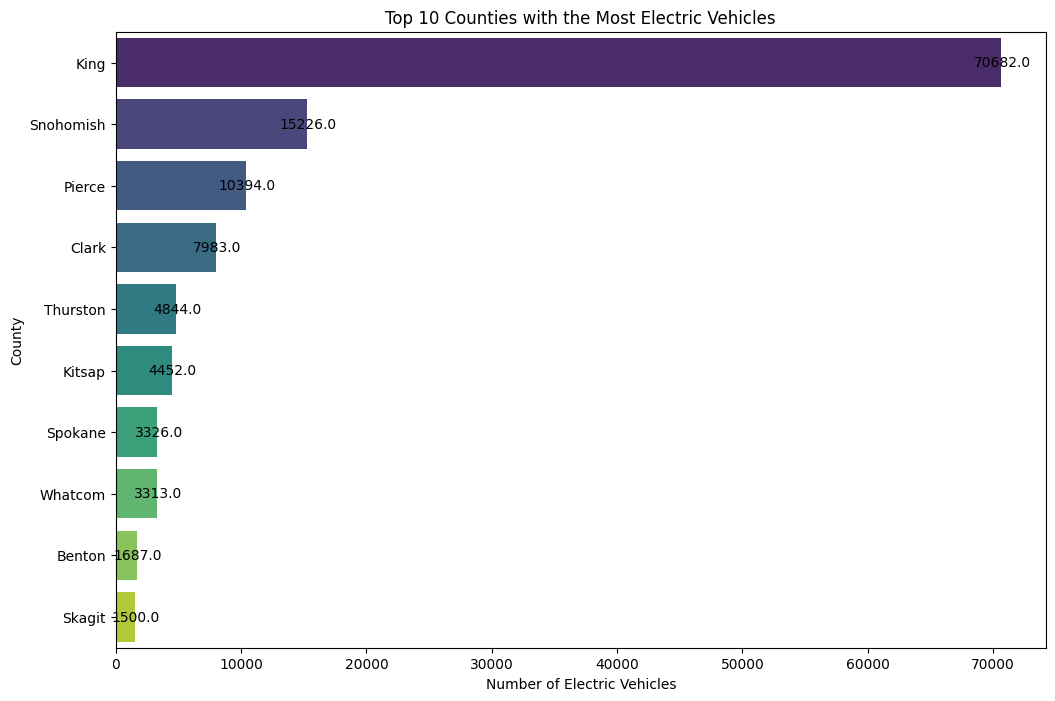

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# Calculate the number of vehicles per county
county_counts = data['County'].value_counts()

# Get the top 10 counties
top_10_counties = county_counts.head(10)

# Plotting the top 10 counties
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_10_counties.values, y=top_10_counties.index, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width() + 100, p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                color='black', fontsize=10)
plt.title('Top 10 Counties with the Most Electric Vehicles')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('County')
plt.show()


In [16]:
count_by_city = data["City"].value_counts()
count_by_city.to_csv("count_by_city.csv")

In [17]:
count_by_city.head(10)

City
Seattle      23408
Bellevue      6944
Redmond       4958
Vancouver     4815
Kirkland      4196
Bothell       4191
Sammamish     3945
Renton        3511
Olympia       3224
Tacoma        2842
Name: count, dtype: int64

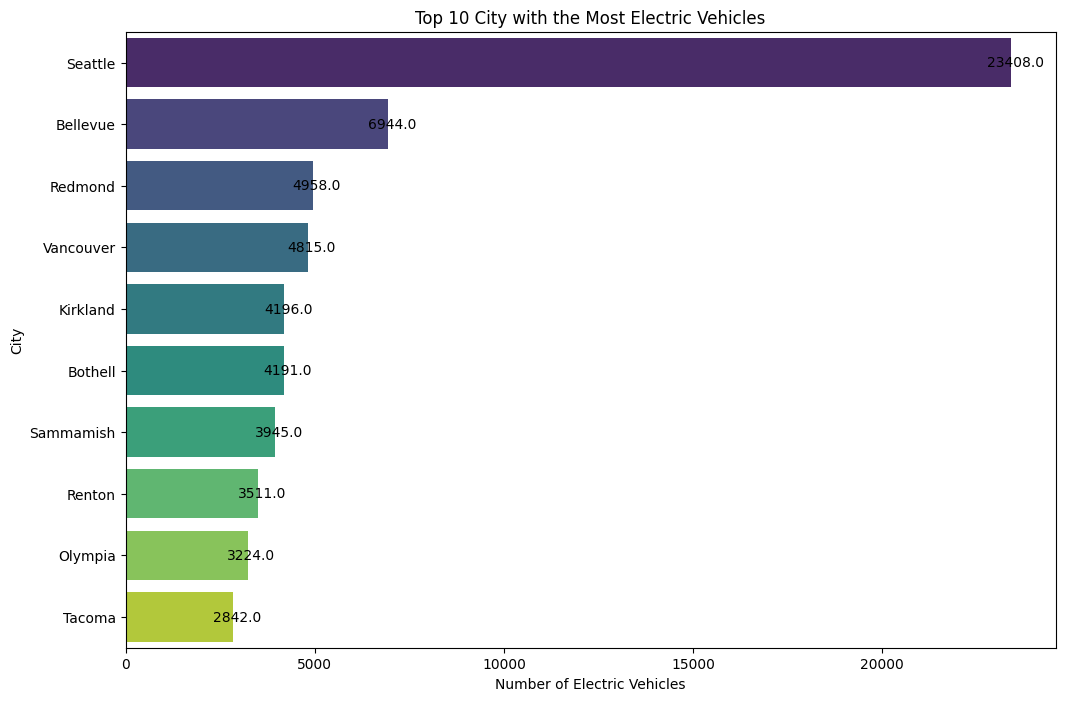

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# Calculate the number of vehicles per county
city_counts = data['City'].value_counts()

# Get the top 10 counties
top_10_cities = city_counts.head(10)

# Plotting the top 10 counties
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_10_cities.values, y=top_10_cities.index,palette='viridis')


for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width() + 100, p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                color='black', fontsize=10)
plt.title('Top 10 City with the Most Electric Vehicles')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('City')
plt.show()

In [19]:
count_by_state = data["State"].value_counts()
count_by_state.to_csv("count_by_state.csv")

In [20]:
count_by_state .head(10)

State
WA    134474
Name: count, dtype: int64

In [21]:
count_by_ModelYear = data["Model Year"].value_counts()
count_by_ModelYear.to_csv("count_by_ModelYear.csv")

In [22]:
count_by_ModelYear.head(10)

Model Year
2022    27919
2023    22209
2021    18478
2018    14314
2020    11119
2019    10555
2017     8557
2016     5676
2015     4910
2013     4589
Name: count, dtype: int64

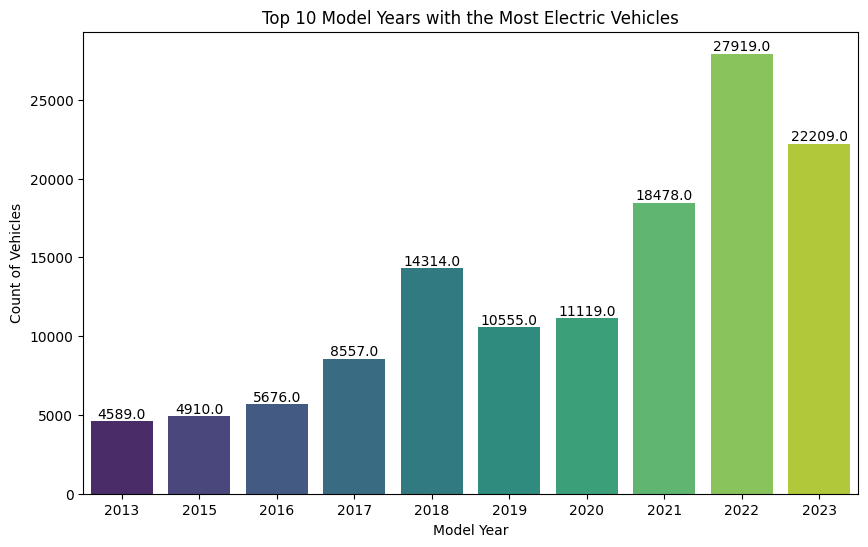

In [23]:
# Calculate the number of vehicles per model year
count_by_ModelYear = data['Model Year'].value_counts().sort_index()

# Sort the counts in descending order and select the top 10
top_10_model_years = count_by_ModelYear.sort_values(ascending=False).head(10)

# Plotting the data
plt.figure(figsize=(10, 6))

# Create a bar plot using seaborn with the 'viridis' color palette
sns.barplot(x=top_10_model_years.index, y=top_10_model_years.values,palette=sns.color_palette('viridis', len(top_10_model_years)))

# Add data labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height() + 0.5),
                ha='center', va='bottom',
                color='black', fontsize=10)

# Set labels and title
plt.xlabel("Model Year")
plt.ylabel("Count of Vehicles")
plt.title("Top 10 Model Years with the Most Electric Vehicles")

# Show plot
plt.show()

In [24]:
count_by_Model = data["Model"].value_counts()


In [25]:
count_by_Model.to_csv("count_by_Model.csv")

In [26]:
count_by_Model.head(10)

Model
MODEL 3        25752
MODEL Y        23531
LEAF           13008
MODEL S         7455
BOLT EV         5414
VOLT            4868
MODEL X         4866
NIRO            2603
ID.4            2473
PRIUS PRIME     2464
Name: count, dtype: int64

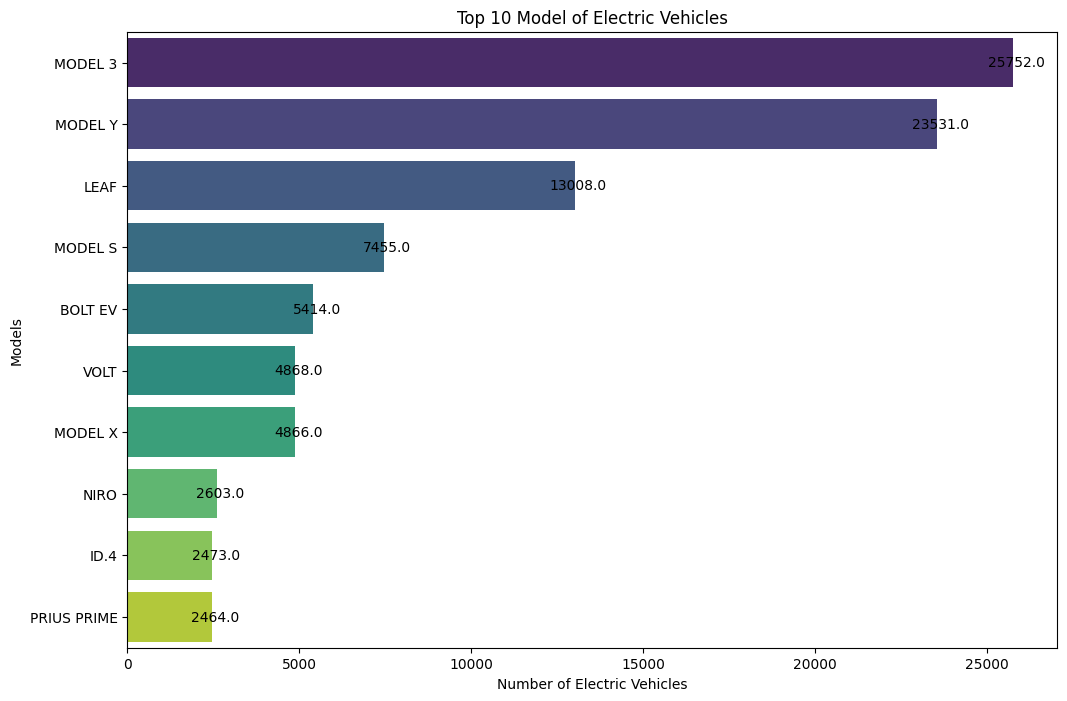

In [27]:
# Get the top 10 Models
top_10_models = count_by_Model.head(10)

# Plotting the top 10 Models
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_10_models.values, y=top_10_models.index,palette='viridis')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width() + 100, p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                color='black', fontsize=10)

plt.title('Top 10 Model of Electric Vehicles')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('Models')
plt.show()

In [28]:
count_by_Make = data["Make"].value_counts()
count_by_Make.to_csv("count_by_Make.csv")

In [29]:
count_by_Make.head(10)

Make
TESLA         61650
NISSAN        13138
CHEVROLET     11417
FORD           6876
BMW            5881
KIA            5484
TOYOTA         4857
VOLKSWAGEN     3518
VOLVO          2965
AUDI           2720
Name: count, dtype: int64

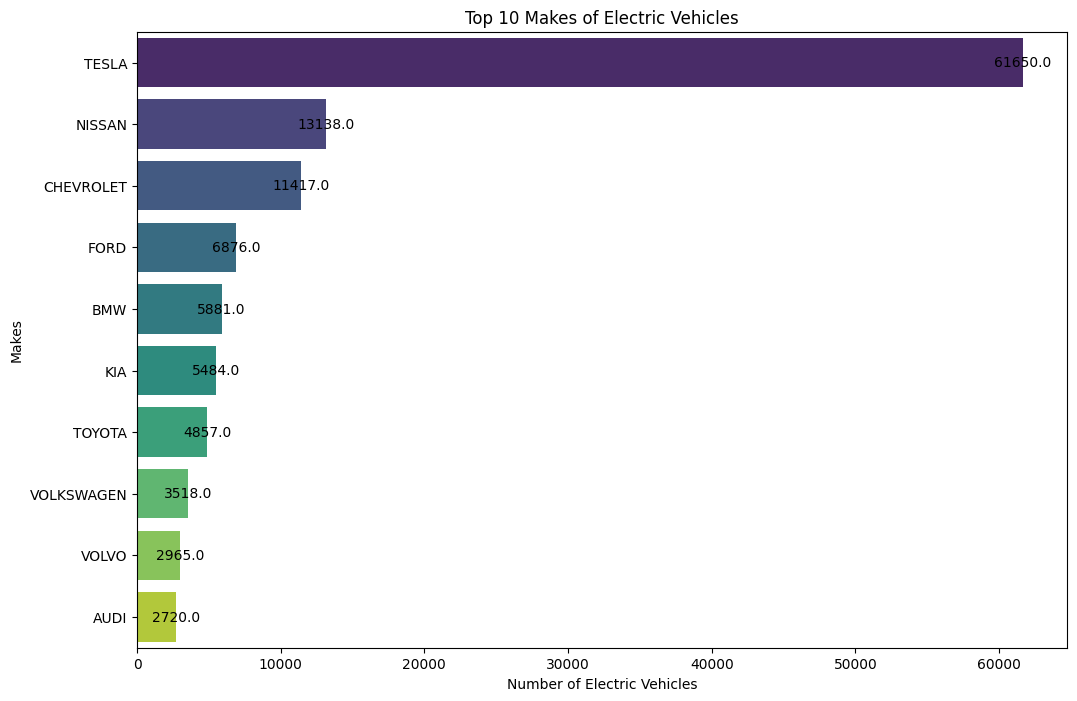

In [30]:
# Get the top 10 makes
top_10_makes = count_by_Make.nlargest(10)

# Plotting the top 10 makes
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_10_makes.values, y=top_10_makes.index, palette='viridis')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                color='black', fontsize=10)

# Add titles and labels
plt.title('Top 10 Makes of Electric Vehicles')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('Makes')
plt.show()


In [31]:
popular_makes = data["Make"].value_counts().head(5)
popular_makes.to_csv("popular_makes.csv")

In [32]:
popular_makes 

Make
TESLA        61650
NISSAN       13138
CHEVROLET    11417
FORD          6876
BMW           5881
Name: count, dtype: int64

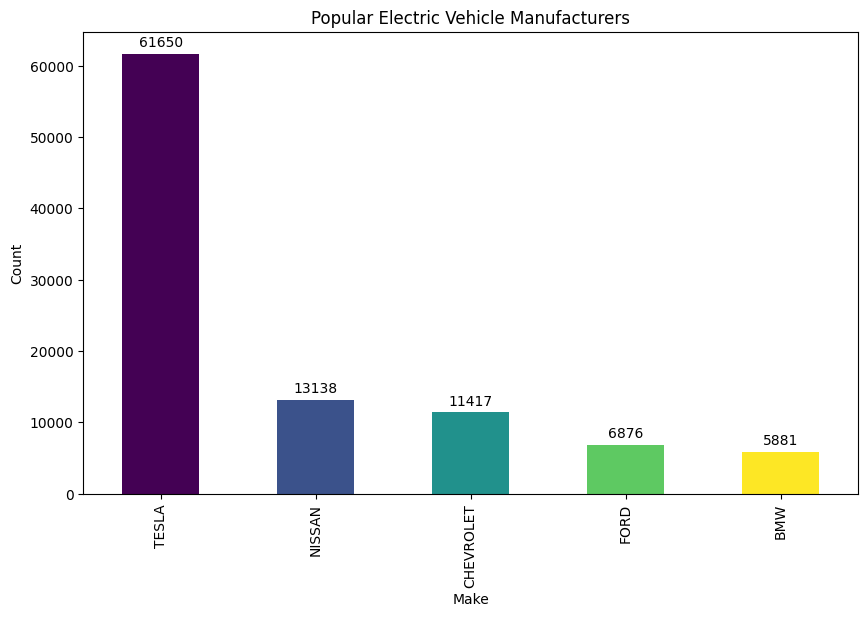

In [33]:

import numpy as np
# Generate a color palette from 'viridis'
colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(popular_makes)))

# Plotting
plt.figure(figsize=(10, 6))

# Create a bar plot with different colors
bars = popular_makes .plot(kind='bar', color=colors)

# Add data labels
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height}', 
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3),  # 3 points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom')

# Set labels and title
plt.xlabel("Make")
plt.ylabel("Count")
plt.title("Popular Electric Vehicle Manufacturers")

# Show plot
plt.show()

In [34]:
count_by_Vehicle_Type  = data["Electric Vehicle Type"].value_counts()
count_by_Vehicle_Type .to_csv("count_by_Vehicle_Type .csv")

In [35]:
count_by_Vehicle_Type

Electric Vehicle Type
Battery Electric Vehicle              103424
Plug-in Hybrid Electric Vehicle        31050
Name: count, dtype: int64

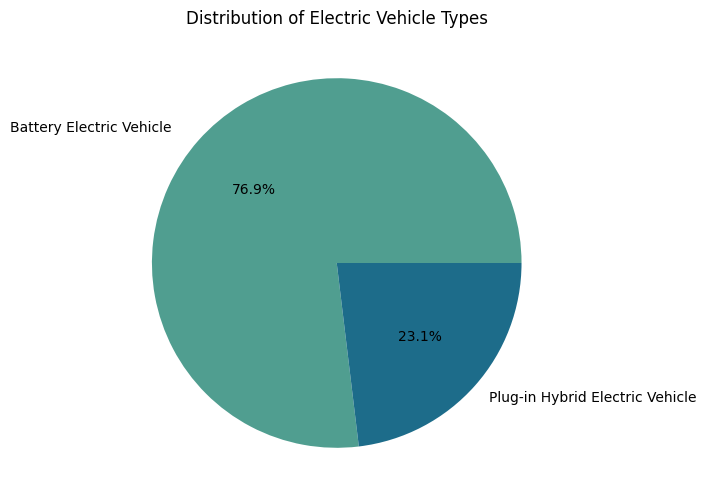

In [36]:

# Plotting the pie chart
plt.figure(figsize=(8, 6))

# Create a color palette with enough colors for the pie chart
colors = sns.color_palette('crest', len(count_by_Vehicle_Type))

# Create a pie chart
plt.pie(count_by_Vehicle_Type, labels=count_by_Vehicle_Type.index, autopct='%1.1f%%', colors=colors)

# Set title
plt.title("Distribution of Electric Vehicle Types")

# Show the plot
plt.show()


In [37]:
count_by_Electric_Range = data["Electric Range"].value_counts()
count_by_Electric_Range.to_csv("count_by_Electric_Range.csv")

In [38]:
count_by_Electric_Range.head(10)

Electric Range
0      56618
215     6422
220     4150
84      4036
238     3508
25      3231
19      2534
208     2499
53      2487
291     2367
Name: count, dtype: int64

In [39]:
max_range = data["Electric Range"].max()
min_range = data["Electric Range"].min()
avg_range = data["Electric Range"].mean()

range_stats = pd.DataFrame({
    "Max Range": [max_range],
    "Min Range": [min_range],
    "Average Range": [avg_range]
})

range_stats.to_csv("range_stats.csv")

In [40]:
range_stats

,Max Range,Min Range,Average Range
0,337,0,74.730208


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, 'TESLA'),
  Text(1, 0, 'NISSAN'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'AUDI'),
  Text(4, 0, 'TOYOTA'),
  Text(5, 0, 'KIA'),
  Text(6, 0, 'FIAT'),
  Text(7, 0, 'FORD'),
  Text(8, 0, 'CHEVROLET'),
  Text(9, 0, 'HYUNDAI'),
  Text(10, 0, 'VOLVO'),
  Text(11, 0, 'VOLKSWAGEN'),
  Text(12, 0, 'CHRYSLER'),
  Text(13, 0, 'SMART'),
  Text(14, 0, 'RIVIAN'),
  Text(15, 0, 'SUBARU'),
  Text(16, 0, 'JEEP'),
  Text(17, 0, 'HONDA'),
  Text(18, 0, 'LINCOLN'),
  Text(19, 0, 'LUCID'),
  Text(20, 0, 'PORSCHE'),
  Text(21, 0, 'MITSUBISHI'),
  Text(22, 0, 'POLESTAR'),
  Text(23, 0, 'MERCEDES-BENZ'),
  Text(24, 0, 'MINI'),
  Text(25, 0, 'JAGUAR'),
  Text(26, 0, 'CADILLAC'),
  Text(27, 0, 'LEXUS'),
  Text(28, 0, 'GENESIS'),
  Text(29, 0, 'WHEEGO ELECTRIC CARS'),
  Text(30, 0, 'FISKER'),
  Text(31, 0, 'MAZDA'),
  Text(32, 0, 'BENTLE

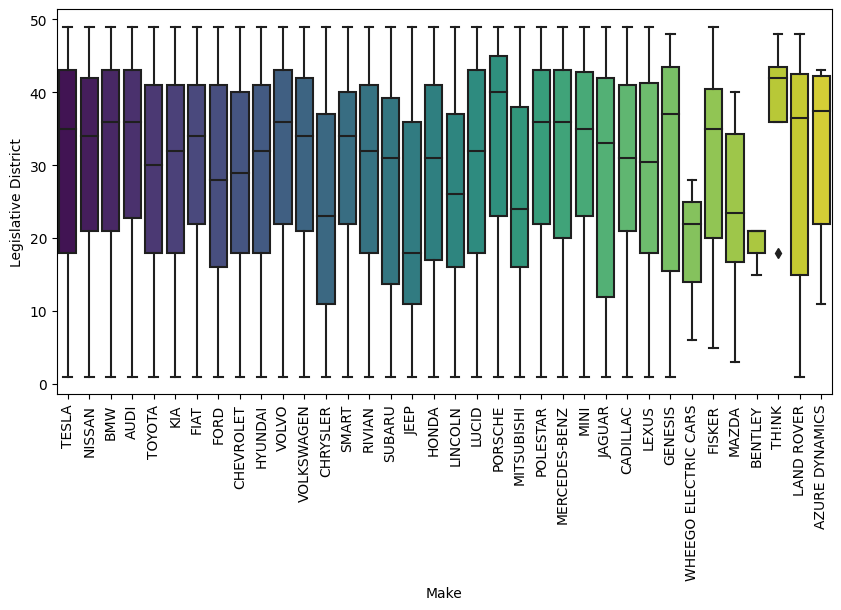

In [41]:
# showing visualization of company located in legislative district of sate washingston

plt.figure(figsize=(10,5))
sns.boxplot(y="Legislative District",x="Make",data=data,palette = 'viridis')
plt.xticks(rotation=90)

# STEP 6 : Feature Selection 

In [42]:
columns_to_drop = ['County', 'Electric Utility']
data_new = data.drop(columns_to_drop, axis=1)

In [43]:
label_encoder = LabelEncoder()
categorical_columns = ['City', 'State', 'Make', 'Model', 'Electric Vehicle Type']
for column in categorical_columns:
    data_new[column] = label_encoder.fit_transform(data[column])

In [44]:
one_hot_encoded = pd.get_dummies(data['Electric Vehicle Type'], prefix='EVType')
data_new = pd.concat([data, one_hot_encoded], axis=1)

In [45]:
features = ['Model Year', 'Make', 'Model']
target = 'Electric Vehicle Type'

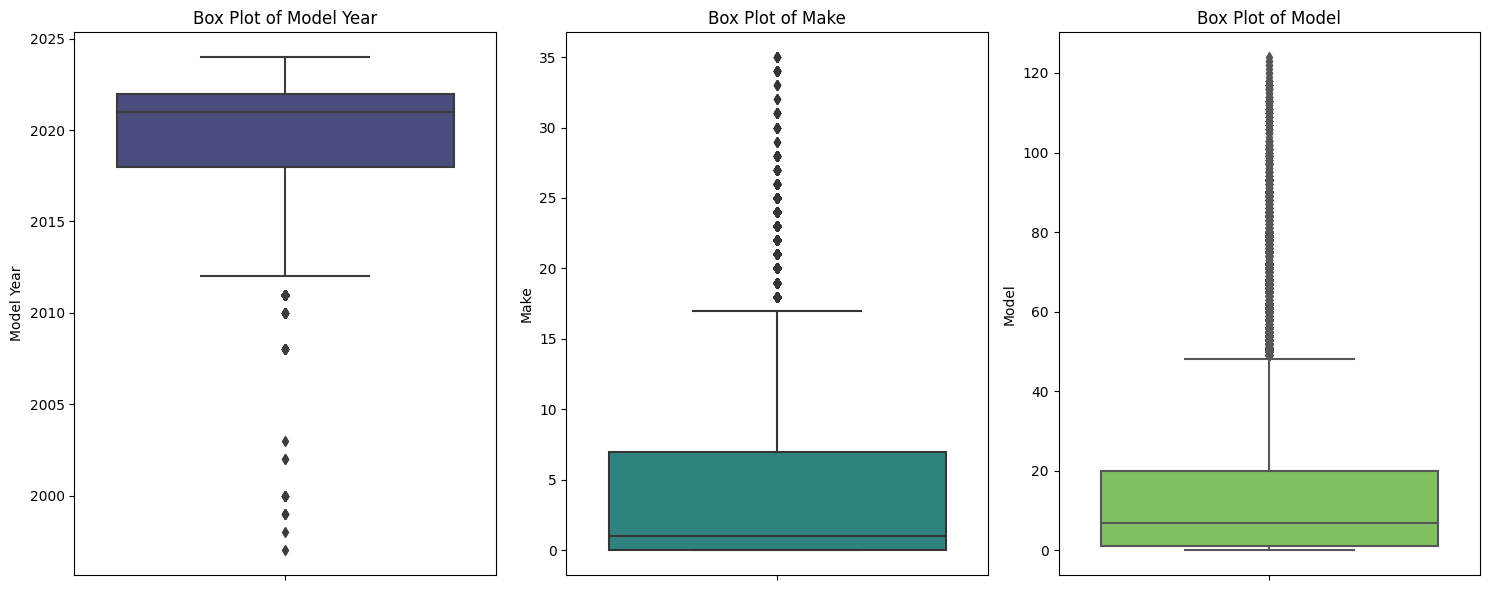

In [46]:
# Convert categorical variables to numeric if needed for plotting
data_encoded = data_new.copy()
data_encoded['Make'] = pd.factorize(data_encoded['Make'])[0]
data_encoded['Model'] = pd.factorize(data_encoded['Model'])[0]
data_encoded['Electric Vehicle Type'] = pd.factorize(data_encoded['Electric Vehicle Type'])[0]

# Convert categorical variables to numeric if needed for plotting
data_encoded = data.copy()
data_encoded['Make'] = pd.factorize(data_encoded['Make'])[0]
data_encoded['Model'] = pd.factorize(data_encoded['Model'])[0]
data_encoded['Electric Vehicle Type'] = pd.factorize(data_encoded['Electric Vehicle Type'])[0]

# Define the color palette for the plots
color = sns.color_palette("viridis", as_cmap=True)

# Plot box plots for each feature
plt.figure(figsize=(15, 6))

# Box plot for 'Model Year'
plt.subplot(1, 3, 1)
sns.boxplot(y=data['Model Year'], color=color(0.2))  # Use a color from the colormap
plt.title('Box Plot of Model Year')

# Box plot for 'Make'
plt.subplot(1, 3, 2)
sns.boxplot(y=data_encoded['Make'], color=color(0.5))  # Use a different color from the colormap
plt.title('Box Plot of Make')

# Box plot for 'Model'
plt.subplot(1, 3, 3)
sns.boxplot(y=data_encoded['Model'], color=color(0.8))  # Use a different color from the colormap
plt.title('Box Plot of Model')

plt.tight_layout()
plt.show()

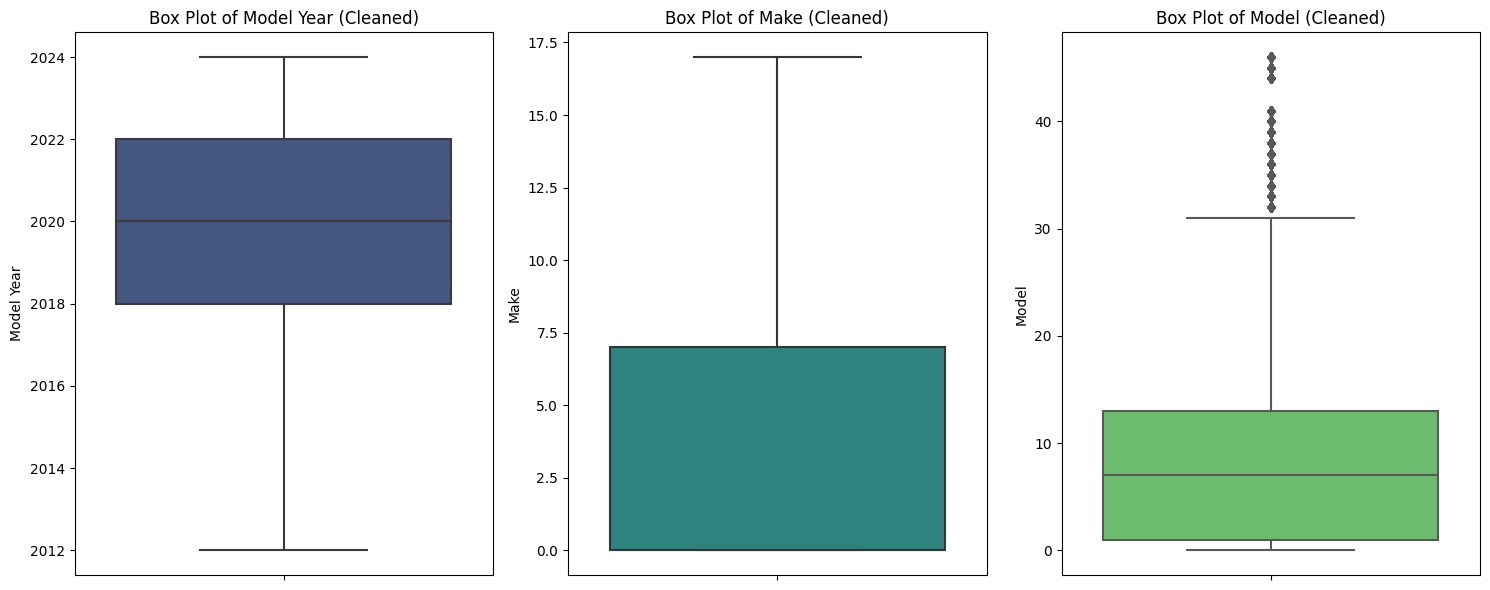

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical variables to numeric
data_encoded = data_new.copy()
data_encoded['Make'] = pd.factorize(data_encoded['Make'])[0]
data_encoded['Model'] = pd.factorize(data_encoded['Model'])[0]
data_encoded['Electric Vehicle Type'] = pd.factorize(data_encoded['Electric Vehicle Type'])[0]

# Function to remove outliers using IQR for a single column
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each column separately
data_new = remove_outliers(data_encoded, 'Model Year')
data_new = remove_outliers(data_new, 'Make')
data_new = remove_outliers(data_new, 'Model')

# Define the color palette for the plots
color_palette = sns.color_palette("viridis", 3)  # Get 3 distinct colors

# Plotting the cleaned data
plt.figure(figsize=(15, 6))

# Box plot for 'Model Year'
plt.subplot(1, 3, 1)
sns.boxplot(y=data_new['Model Year'], color=color_palette[0])
plt.title('Box Plot of Model Year (Cleaned)')

# Box plot for 'Make'
plt.subplot(1, 3, 2)
sns.boxplot(y=data_new['Make'], color=color_palette[1])
plt.title('Box Plot of Make (Cleaned)')

# Box plot for 'Model'
plt.subplot(1, 3, 3)
sns.boxplot(y=data_new['Model'], color=color_palette[2])
plt.title('Box Plot of Model (Cleaned)')

plt.tight_layout()
plt.show()


# STEP 7 : Data Modeling

# 7.1 . Splitting Data into Train and Test Sets :

In [48]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(data_new[features], data_new[target], test_size=0.2, random_state=42)

# 7.2. Creating DMatrix for Training and Testing Data :


In [49]:
import xgboost as xgb
from xgboost import XGBClassifier

In [50]:
# Initialize the XGBClassifier
model = XGBClassifier(
    use_label_encoder=False,  # To suppress the warning about the deprecation of the default encoder
    eval_metric='logloss'     # Set appropriate evaluation metric
)

# Train the model
model.fit(train_data, train_target)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

# 7.4. Defining XGBoost Model Parameters :

In [51]:
params = {
    'objective': 'multi:softmax',
    'num_class': len(data[target].unique()), 
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'gamma': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'merror'
}

# 7.5. Making Predictions and Calculating Accuracy :

In [52]:
# Make predictions
predictions = model.predict(test_data)

In [53]:
predictions = [int(round(pred)) for pred in predictions]

In [54]:
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(test_target, predictions)
print("Exactitude : {:.2f}%".format(accuracy * 100))

Exactitude : 98.89%


# 7.6. Comparison of Actual and Predicted Electric Vehicle Types :

In [55]:
from sklearn.metrics import confusion_matrix


# 7.7. Calculating the confusion matrix :

In [56]:
conf_matrix = confusion_matrix(test_target, predictions)

# 7.8. Display the confusion matrix :

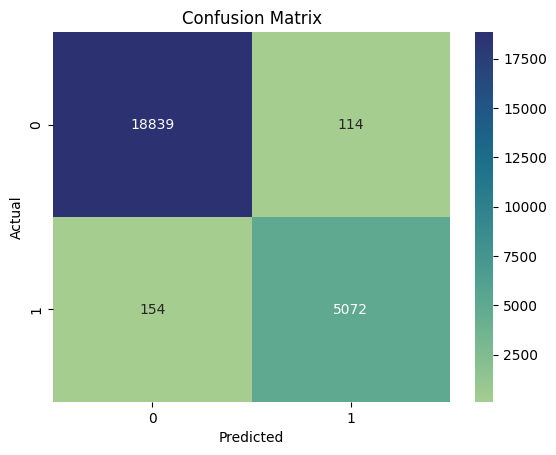

In [57]:
# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the confusion matrix
plt.show()

# 7.9. Create a DataFrame with actual and predicted values :

In [58]:
comparison_df = pd.DataFrame({'Actual': test_target, 'Predicted': predictions})

# 7.10.Add columns to indicate different prediction categories :

In [59]:
comparison_df['True Positive'] = (comparison_df['Actual'] == 1) & (comparison_df['Predicted'] == 1)
comparison_df['True Negative'] = (comparison_df['Actual'] == 0) & (comparison_df['Predicted'] == 0)
comparison_df['False Positive'] = (comparison_df['Actual'] == 0) & (comparison_df['Predicted'] == 1)
comparison_df['False Negative'] = (comparison_df['Actual'] == 1) & (comparison_df['Predicted'] == 0)

In [60]:
sns.set(style='whitegrid')

# 7.11.Plot a countplot comparing the actual and predicted values :

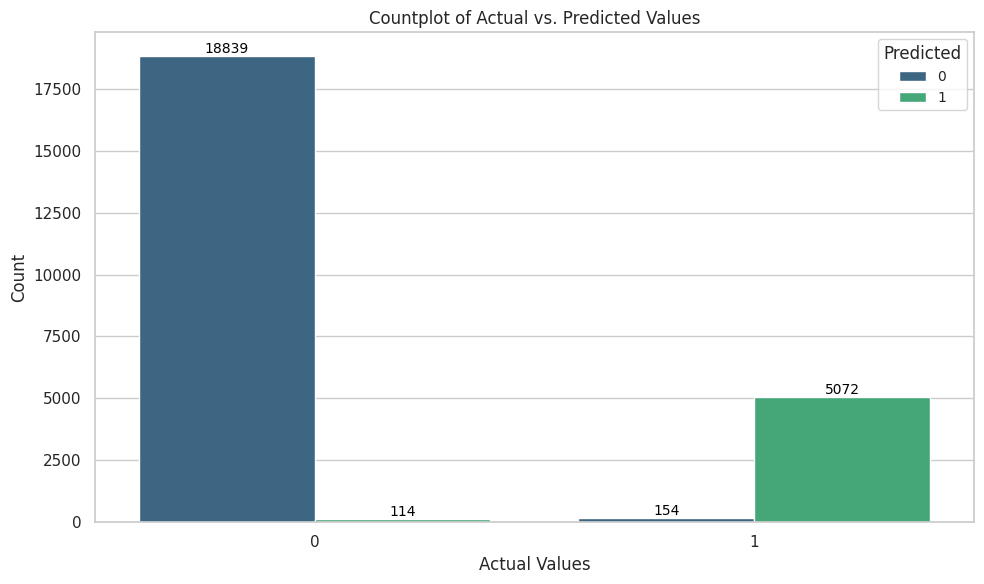

In [61]:
# Plotting
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Actual', hue='Predicted', data=comparison_df, palette='viridis')

# Set labels and title
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Countplot of Actual vs. Predicted Values', fontsize=12)

# Add a legend
plt.legend(title='Predicted', loc='upper right', fontsize=10)

# Annotate each bar with counts
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height + 0.2
    ax.annotate(f'{int(height)}', (x, y), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()